# K-means Clustering


## Introduction

In this project, we will explore the use of the k-means clustering algorithm for analyzing BTCUSDT 5-minute OHLC (Open, High, Low, Close) data. The k-means algorithm is a popular unsupervised machine learning method used for clustering data into groups, or clusters, based on their similarity. The main objective of this project is to categorize the data into different market types, such as trending (bullish and bearish) and sideways markets. By doing so, we aim to identify patterns and characteristics of these market types to enhance our understanding of the underlying dynamics and potentially develop algorithmic trading strategies for cryptocurrencies.

## K-means Algorithm
The k-means algorithm aims to partition a set of data points into k clusters, minimizing the sum of squared distances between each data point and the centroid of the cluster it belongs to. The algorithm can be described in the following steps:

1. Initialize k cluster centroids randomly by selecting k data points.
2. Assign each data point to the closest centroid.
3. Update the centroids by calculating the mean of all the data points assigned to each centroid.
4. Repeat steps 2 and 3 until the centroids' positions no longer change or a maximum number of iterations is reached.

The objective function for k-means is given by:

$$
J(\mu) = \sum_{i=1}^{m} \sum_{j=1}^{k} w_{ij} ||x_i - \mu_j||^2
$$

where $m$ is the number of data points, $k$ is the number of clusters, $x_i$ is the $i$-th data point, $\mu_j$ is the $j$-th centroid, and $w_{ij}$ is an indicator variable that is equal to 1 if the data point $x_i$ is assigned to centroid $\mu_j$, and 0 otherwise.

## Project Overview

In this project, we will perform the following steps to analyze the BTCUSDT 5-minute OHLC data using the k-means clustering algorithm:

- **Data preprocessing:** We will first preprocess the raw OHLC data to extract relevant features, such as price returns and volatility measures, which will be used as input for the k-means algorithm.
- **Feature scaling:** Since k-means is sensitive to the scale of the input features, we will standardize the data to have zero mean and unit variance.
- **Model training:** We will apply the k-means algorithm to the preprocessed data and determine the optimal number of clusters using methods such as the elbow method or silhouette analysis.
- **Cluster analysis:** Once the clusters are formed, we will analyze the characteristics of each cluster to identify patterns and relationships between the different market types.
- **Evaluation:** We will evaluate the performance of our clustering approach by comparing it to alternative techniques, such as Marcos Lopez De Prado's trend scanning method, and assess its potential for developing algorithmic trading strategies in the cryptocurrency market.
By the end of this project, we aim to gain insights into the dynamics of the cryptocurrency market and explore the potential of k-means clustering as a tool for developing algorithmic trading strategies.

## Data preprocessing:

 In this step, we preprocess the raw OHLC data to extract relevant features for our analysis. We calculate the simple percentage returns, which represent the relative change in price over time, as well as the logarithmic returns, which are the natural logarithm of the ratio of the current price to the previous price. Logarithmic returns have better mathematical properties, making them more suitable for financial analysis and machine learning applications. Additionally, we compute the historical volatility using the rolling standard deviation of the logarithmic returns, which serves as a measure of price fluctuations. These features—price returns and volatility—will be used as input for the k-means algorithm in our analysis of BTCUSDT 5-minute data.

In [8]:
import sys
sys.path.append('/Volumes/Work&Study/Trading/API_Data')
import all_keys as keys
import numpy as np
import pandas as pd
import pymongo as pym

from DataBase import MyDatabase 
from ToolKit import Toolkit as tk
from TechnicalIndicators import TechnicalIndicators as ti

import matplotlib.pyplot as plt
import seaborn as sns

user = keys.mongo_user
password = keys.mongo_pass

db = MyDatabase(user, password)
df_1 = db.get_data_from_mongo(user, password, 'coinalyze', 'btcusdt_5m')
df_2 = db.get_data_from_mongo(user, password, 'cryptoquant_daily', 'bitcoin_cq_1d')

df = tk.align_dataframes(df_1, df_2)

df['returns'] = df['close'].pct_change()

# Calculate the logarithmic returns
df['log_returns'] = np.log(df['close'] / df['close'].shift(1))

# Calculate the rolling standard deviation (volatility) using a selected window size
window_size = 24 * 12 # 5min data
df['volatility'] = df['log_returns'].rolling(window=window_size).std()

df = df.dropna()
df

,date,open,high,low,close,volume,buy_volume,total_trades,buy_trades,ratio,...,outflow_mean_1d,outflow_mean_ma7_1d,exchange_supply_ratio_1d,transactions_count_inflow_1d,transactions_count_outflow_1d,addresses_count_inflow_1d,addresses_count_outflow_1d,returns,log_returns,volatility
288,2023-03-21 23:00:00,28019.2,28025.9,27970.0,28005.0,878.355,304.090,3676,1663,0.7179,...,19.704073,17.630148,0.030161,20853.0,866.0,20180.0,19772.0,-0.000503,-0.000503,0.001721
289,2023-03-21 23:05:00,28005.0,28033.0,27990.0,28013.9,566.128,270.810,2963,1563,0.7176,...,19.704073,17.630148,0.030161,20853.0,866.0,20180.0,19772.0,0.000318,0.000318,0.001702
290,2023-03-21 23:10:00,28013.9,28020.0,27981.5,28002.2,547.378,290.375,2963,1511,0.7185,...,19.704073,17.630148,0.030161,20853.0,866.0,20180.0,19772.0,-0.000418,-0.000418,0.001701
291,2023-03-21 23:15:00,28002.3,28065.8,28000.0,28061.9,1183.066,757.011,4264,2492,0.7185,...,19.704073,17.630148,0.030161,20853.0,866.0,20180.0,19772.0,0.002132,0.002130,0.001704
292,2023-03-21 23:20:00,28061.9,28061.9,28032.0,28053.9,703.967,332.910,3398,1542,0.7197,...,19.704073,17.630148,0.030161,20853.0,866.0,20180.0,19772.0,-0.000285,-0.000285,0.001704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5099,2023-04-07 15:55:00,27923.5,27933.9,27923.5,27930.2,333.139,190.479,1547,875,1.2326,...,8.267113,9.612060,0.030447,21034.0,819.0,19730.0,18541.0,0.000236,0.000236,0.000800
5100,2023-04-07 16:00:00,27930.2,27936.3,27924.6,27930.0,480.221,240.357,1841,980,1.2336,...,8.267113,9.612060,0.030447,21034.0,819.0,19730.0,18541.0,-0.000007,-0.000007,0.000798
5101,2023-04-07 16:05:00,27930.0,27940.6,27922.6,27925.2,483.628,245.283,1877,939,1.2331,...,8.267113,9.612060,0.030447,21034.0,819.0,19730.0,18541.0,-0.000172,-0.000172,0.000798
5102,2023-04-07 16:10:00,27925.2,27926.1,27913.7,27917.0,466.329,140.862,1470,581,1.2321,...,8.267113,9.612060,0.030447,21034.0,819.0,19730.0,18541.0,-0.000294,-0.000294,0.000798


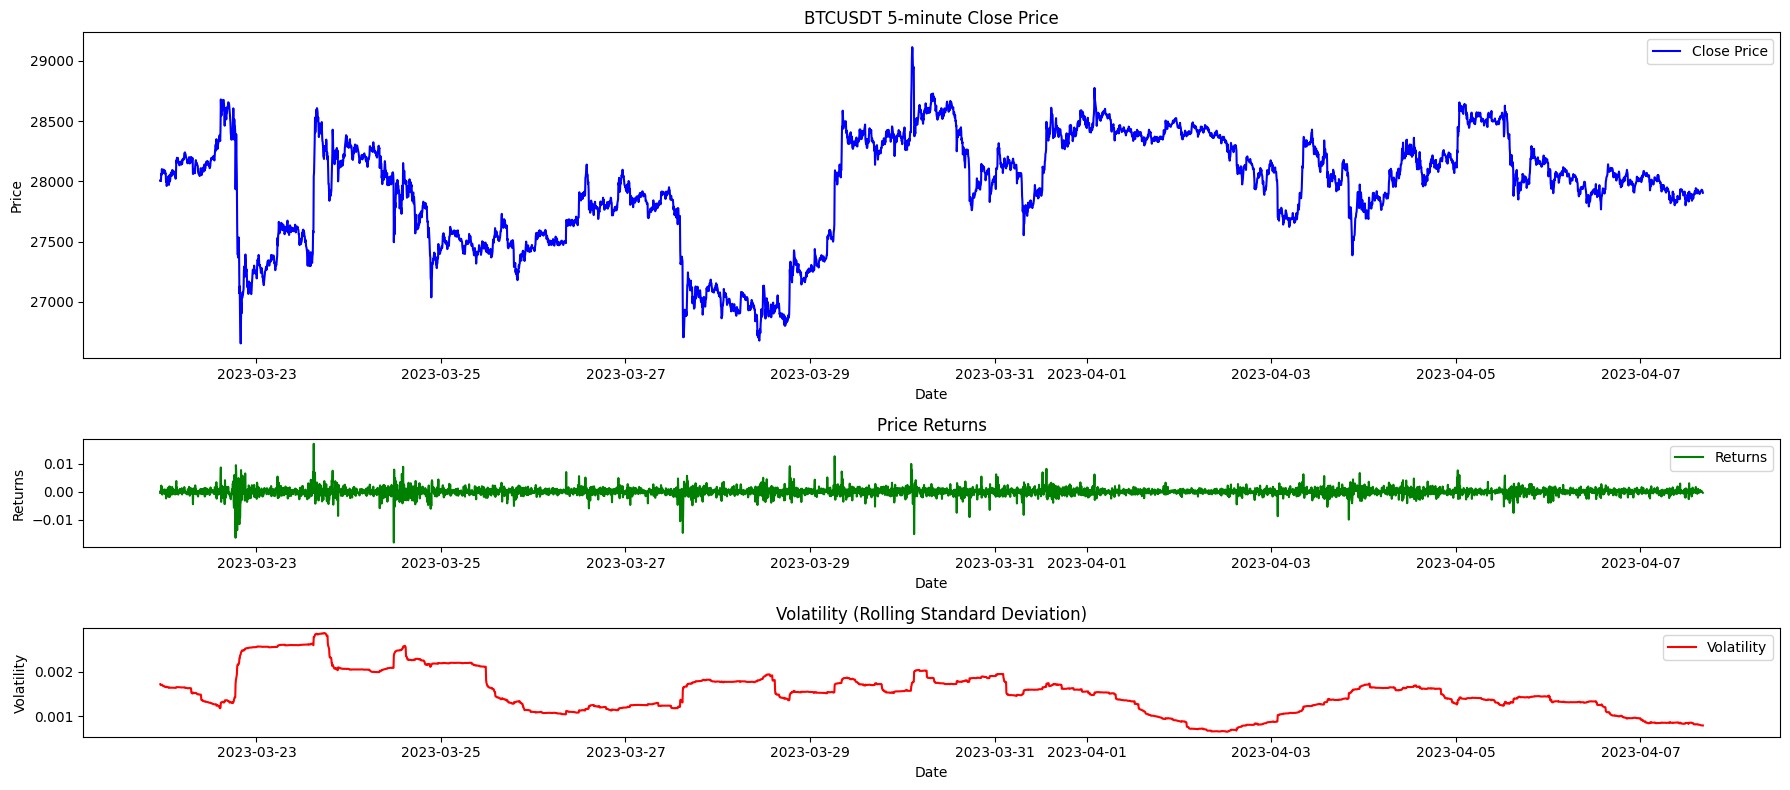

In [13]:
import matplotlib.pyplot as plt

# Set the size of the figure
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(18, 8), gridspec_kw={'height_ratios': [3, 1, 1]})

# Plot the close prices in the first row
ax1.plot(df['date'], df['close'], label='Close Price', color='blue')
ax1.set_title('BTCUSDT 5-minute Close Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax1.legend()

# Plot the returns distribution in the second row
ax2.plot(df['date'], df['returns'], label='Returns', color='green')
ax2.set_title('Price Returns')
ax2.set_xlabel('Date')
ax2.set_ylabel('Returns')
ax2.legend()

# Plot the volatility in the third row
ax3.plot(df['date'], df['volatility'], label='Volatility', color='red')
ax3.set_title('Volatility (Rolling Standard Deviation)')
ax3.set_xlabel('Date')
ax3.set_ylabel('Volatility')
ax3.legend()

# Display the plot
plt.tight_layout()
plt.show()


# Feature scaling: 

The k-means algorithm is sensitive to the scale of input features, which can impact the algorithm's performance and clustering results. To address this, we standardize the data by transforming the features to have zero mean and unit variance. This ensures that each feature contributes equally to the algorithm and prevents any single feature from dominating the clustering process due to differences in scale.

In [16]:
from sklearn.preprocessing import StandardScaler

# Standardize the features using StandardScaler
scaler = StandardScaler()
df[['returns_standardized', 'log_returns_standardized', 'volatility_standardized']] = scaler.fit_transform(df[['returns', 'log_returns', 'volatility']])

In [17]:
numeric_features = ['returns_standardized', 'log_returns_standardized', 'volatility_standardized']
X = df[numeric_features]
X

,returns_standardized,log_returns_standardized,volatility_standardized
288,-0.318782,-0.317895,0.401092
289,0.200903,0.201550,0.362594
290,-0.264613,-0.263732,0.359738
291,1.349219,1.347825,0.366606
292,-0.180703,-0.179839,0.366790
...,...,...,...
5099,0.149354,0.150043,-1.557669
5100,-0.004787,-0.003994,-1.560450
5101,-0.109035,-0.108194,-1.560982
5102,-0.186120,-0.185254,-1.560686


# Model training:

In Step 3, we will train the k-means clustering model on the preprocessed data and determine the optimal number of clusters. To achieve this, we will use the following approach:

1. Choose a range of possible cluster numbers (e.g., from 2 to 10).
2. Train the k-means clustering model for each possible number of clusters and calculate the relevant evaluation metric (e.g., within-cluster sum of squares or silhouette score).
3. Analyze the results of the evaluation metric to determine the optimal number of clusters (using methods like the elbow method or silhouette analysis).

In this step, we will apply the k-means algorithm to the preprocessed and standardized data. The k-means algorithm is an unsupervised learning technique that aims to partition the data into clusters based on the similarity of the data points. We will experiment with different numbers of clusters to find the optimal value that best represents the underlying structure of our data. To determine the optimal number of clusters, we will use evaluation methods such as the elbow method or silhouette analysis. The elbow method is based on the within-cluster sum of squares (WCSS), which measures the compactness of the clusters. By plotting the WCSS for a range of cluster numbers, we can identify the "elbow point," where adding more clusters leads to diminishing returns in terms of WCSS reduction. On the other hand, silhouette analysis evaluates the quality of clustering by calculating the silhouette score, which measures how well each data point fits within its assigned cluster and how separate it is from other clusters. A higher silhouette score indicates better clustering quality. By comparing the silhouette scores for different cluster numbers, we can determine the optimal value that leads to the best clustering results for our BTCUSDT 5-minute data analysis.

### Elbow method : within-cluster sum of squares (WCSS) 

We will plot the WCSS for a range of cluster numbers to identify the "elbow point," where adding more clusters leads to diminishing returns in terms of WCSS reduction. To do this, follow these steps:

1. Import the necessary libraries and set up the range of cluster numbers to test (e.g., from 2 to 10).
2. Initialize an empty list to store the WCSS values for each cluster number.
3. Loop through the range of cluster numbers, fitting a k-means model for each cluster number, and calculating the WCSS for that model.
4. Plot the WCSS values against the range of cluster number
5. We will then use the kneed library to confirm pur visual findings to match the optimal clusters to use

Optimal number of clusters: 7


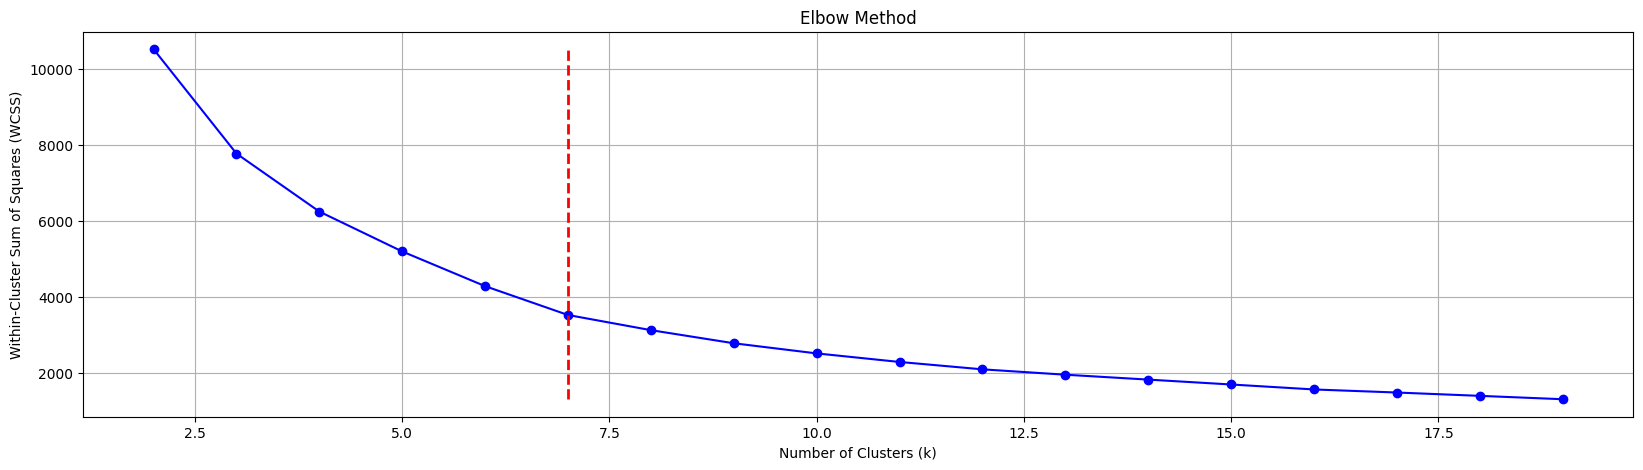

In [31]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

# Set up the range of cluster numbers to test
cluster_range = range(2, 20)

# Initialize an empty list to store the WCSS values
wcss = []

# Loop through the range of cluster numbers
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    

# Find the elbow point
knee_locator = KneeLocator(cluster_range, wcss, curve='convex', direction='decreasing')

# Get the optimal number of clusters
optimal_clusters = knee_locator.knee
print("Optimal number of clusters:", optimal_clusters)

# Plot the WCSS values against the range of cluster numbers with figsize=(10, 6)
plt.figure(figsize=(20, 5))
plt.plot(cluster_range, wcss, marker='o', linestyle='-', color='b')
plt.vlines(optimal_clusters, min(wcss), max(wcss), colors='r', linestyle='--', lw=2)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.grid(True)
plt.show()


In [36]:
model = KMeans(n_clusters=7, n_init=10, random_state=42)
model.fit(X)
model.cluster_centers_

array([[ 7.62548516e-01,  7.62338295e-01,  1.53513116e-03],
       [-2.25711134e-02, -2.18875678e-02, -1.22065615e+00],
       [ 5.12714452e-02,  5.17924798e-02,  1.66179069e+00],
       [ 3.12675350e+00,  3.11670767e+00,  8.15236925e-01],
       [-6.53293158e+00, -6.56618640e+00,  6.27363701e-01],
       [-2.53320873e-01, -2.52515232e-01, -1.14641323e-02],
       [-1.54742859e+00, -1.54796370e+00,  4.40990475e-01]])

In [37]:
X

,returns_standardized,log_returns_standardized,volatility_standardized
288,-0.318782,-0.317895,0.401092
289,0.200903,0.201550,0.362594
290,-0.264613,-0.263732,0.359738
291,1.349219,1.347825,0.366606
292,-0.180703,-0.179839,0.366790
...,...,...,...
5099,0.149354,0.150043,-1.557669
5100,-0.004787,-0.003994,-1.560450
5101,-0.109035,-0.108194,-1.560982
5102,-0.186120,-0.185254,-1.560686


In [40]:
preds = model.predict(X)
preds

array([5, 5, 5, ..., 1, 1, 1], dtype=int32)

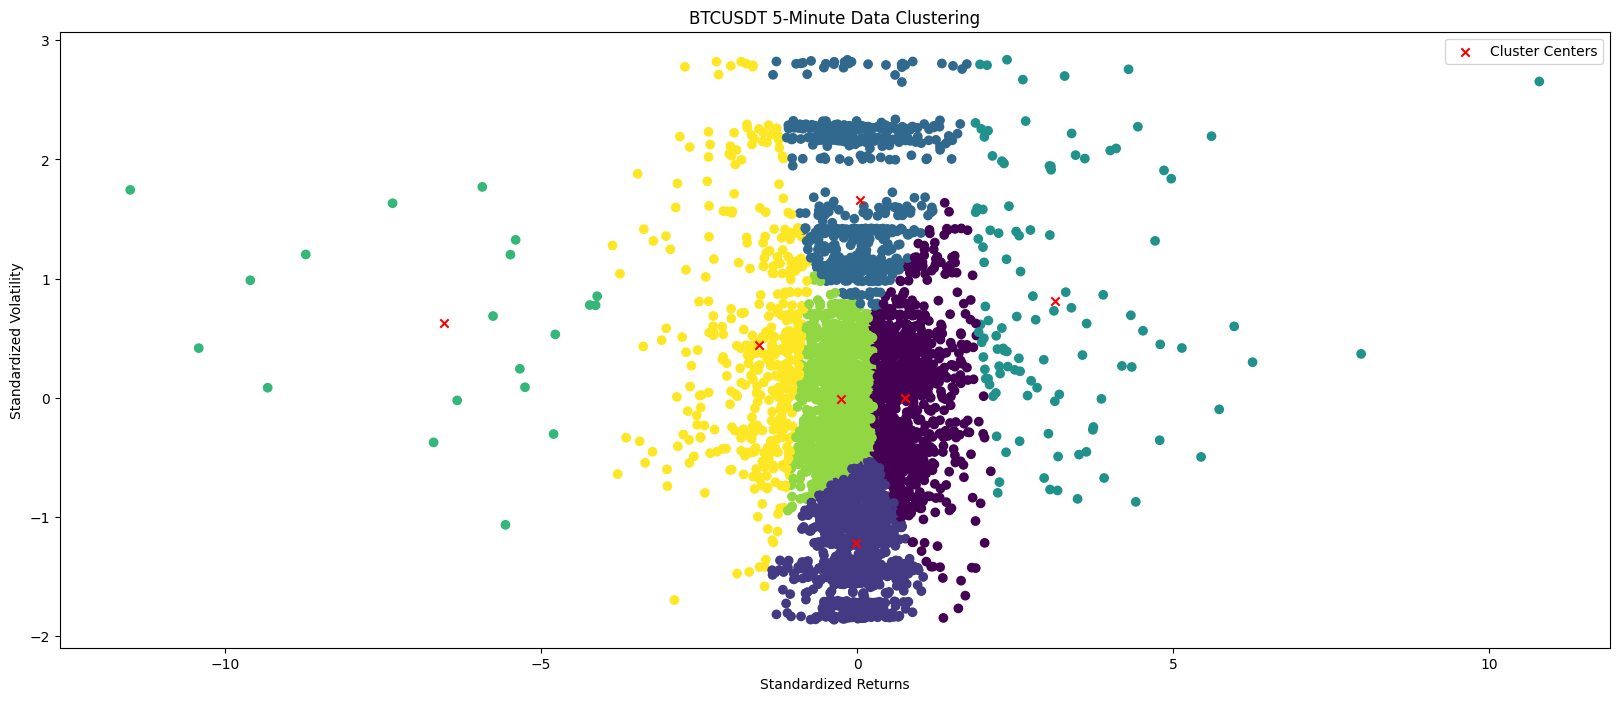

In [55]:
plt.figure(figsize=(20, 8))
sns.scatterplot(data=X, x='returns_standardized', y='volatility_standardized', hue=preds, palette='viridis', legend=None)

centers_x, centers_y = model.cluster_centers_[:, 0], model.cluster_centers_[:, 2]

plt.scatter(X['returns_standardized'], X['volatility_standardized'], c=preds, cmap='viridis')
plt.scatter(centers_x, centers_y, c='red', marker='x', label='Cluster Centers')
plt.xlabel('Standardized Returns')
plt.ylabel('Standardized Volatility')
plt.title('BTCUSDT 5-Minute Data Clustering')
plt.legend()
plt.show()

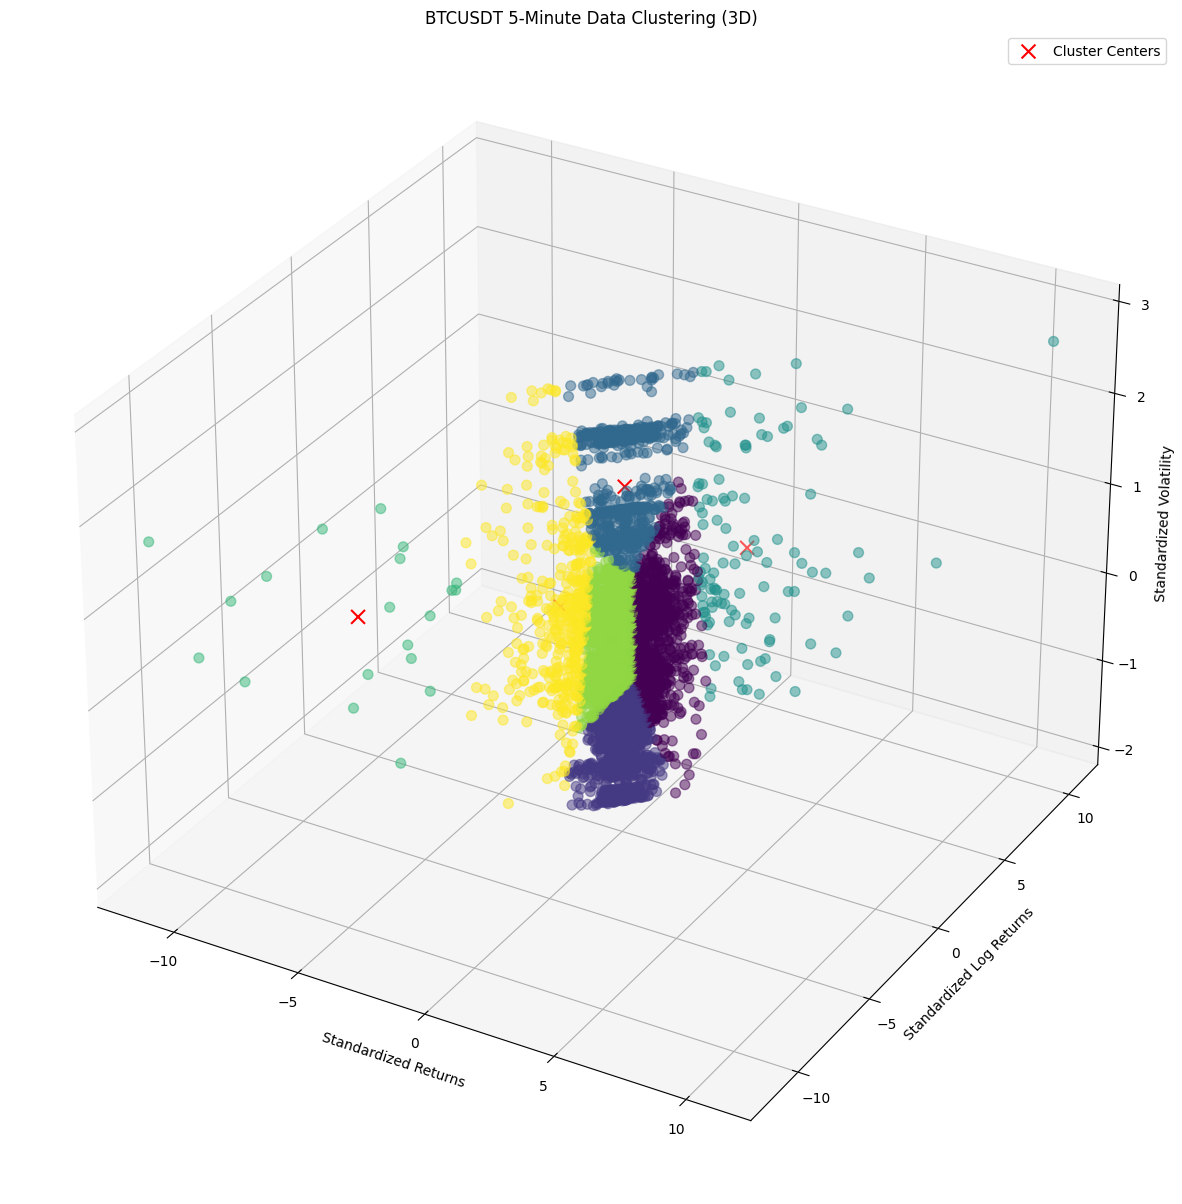

In [56]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 18))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X['returns_standardized'], X['log_returns_standardized'], X['volatility_standardized'], c=preds, s=50, cmap='viridis', alpha=0.5)

centers_x, centers_y, centers_z = model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], model.cluster_centers_[:, 2]
ax.scatter(centers_x, centers_y, centers_z, c='red', marker='x', s=100, label='Cluster Centers')

ax.set_xlabel('Standardized Returns')
ax.set_ylabel('Standardized Log Returns')
ax.set_zlabel('Standardized Volatility')
ax.set_title('BTCUSDT 5-Minute Data Clustering (3D)')
plt.legend()
plt.show()


In [57]:
model.inertia_

3535.9164838131073

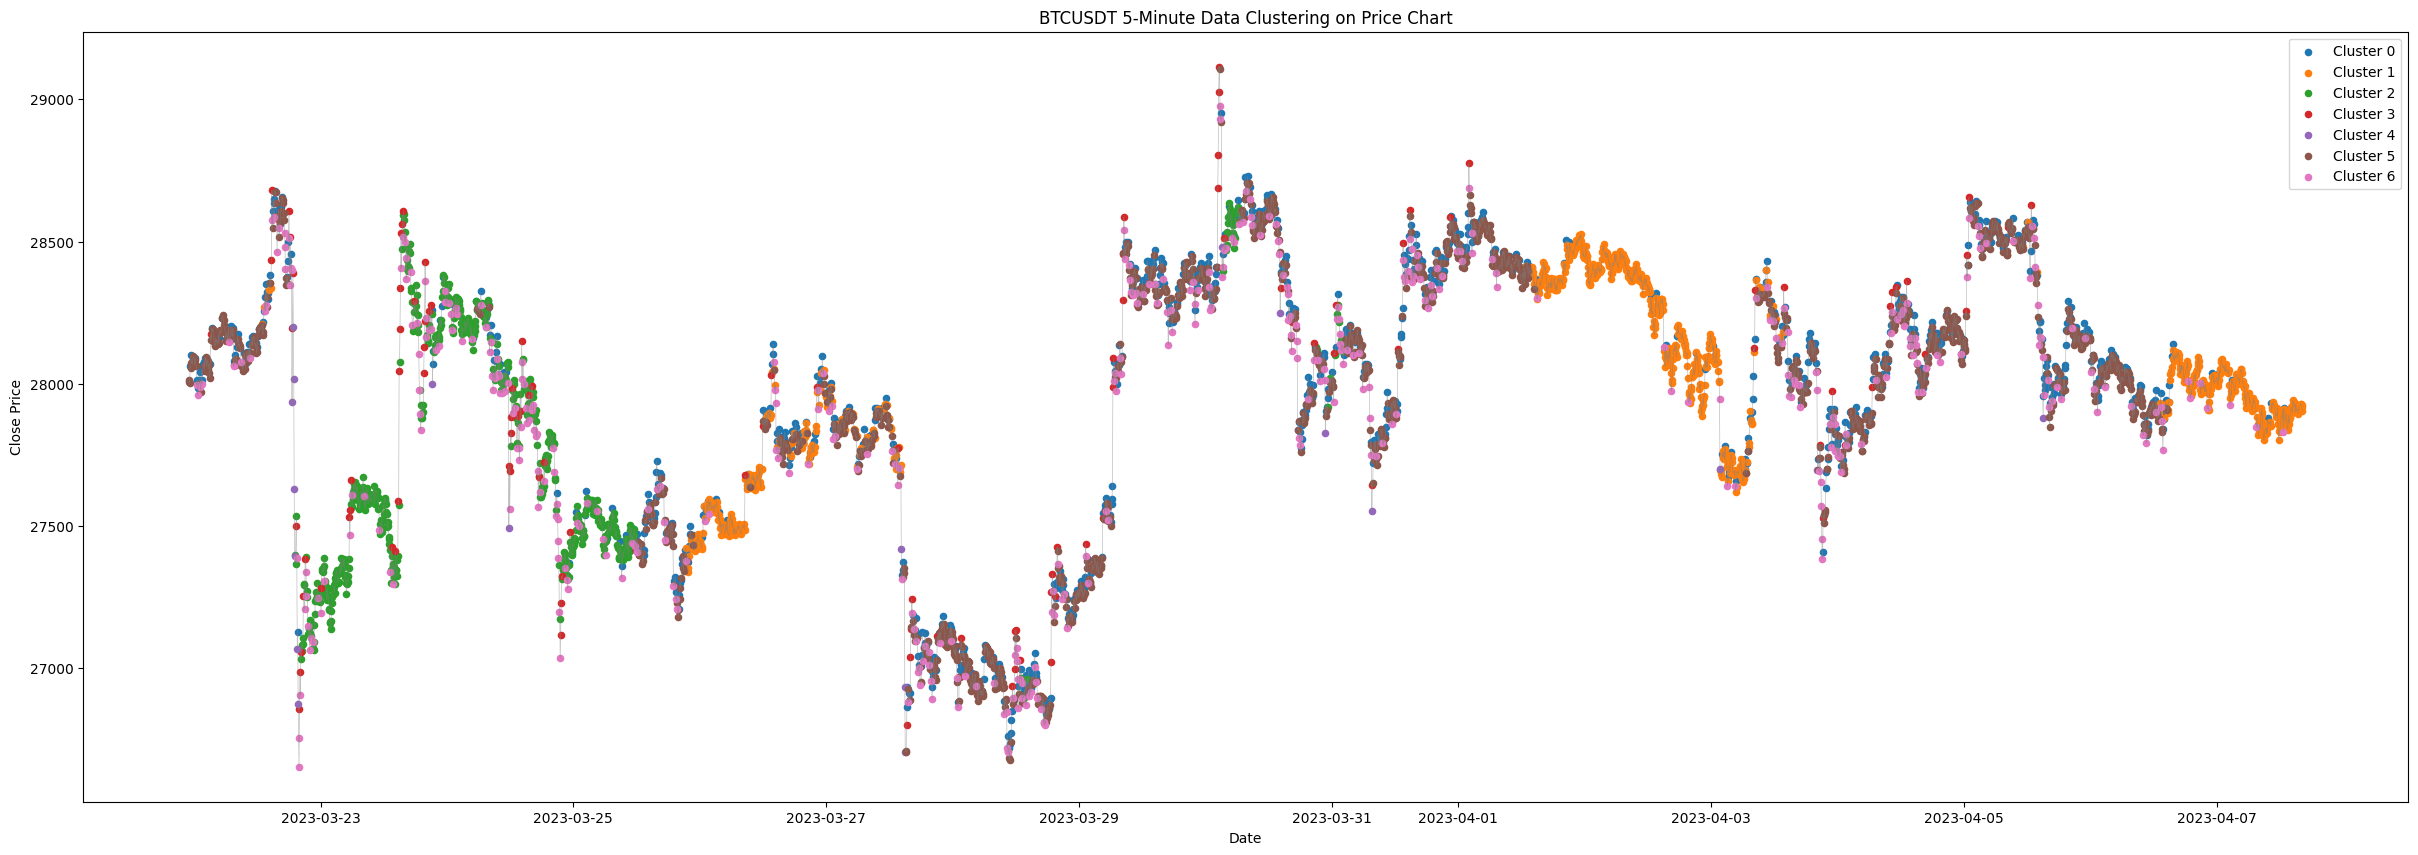

In [61]:
plt.figure(figsize=(30, 10))
plt.plot(df['date'], df['close'], linewidth=0.5, color='gray', alpha=0.5)

for cluster in range(7):
    cluster_data = df[df['cluster'] == cluster]
    plt.scatter(cluster_data['date'], cluster_data['close'], label=f'Cluster {cluster}', s=20)

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('BTCUSDT 5-Minute Data Clustering on Price Chart')
plt.legend()
plt.show()


In [69]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{'secondary_y': True}]])

fig.add_trace(go.Scatter(x=df['date'], y=df['close'], name='Close Price', line=dict(color='gray', width=0.5), opacity=0.9))

for cluster in range(7):
    cluster_data = df[df['cluster'] == cluster]
    fig.add_trace(go.Scatter(x=cluster_data['date'], y=cluster_data['close'], mode='markers', name=f'Cluster {cluster}', marker=dict(size=4)))

#chaging the figure size figsize=(30, 10)

fig.update_layout(width=1500, height=500)

fig.update_layout(plot_bgcolor='rgba(0,0,0,0)', xaxis_showgrid=False, yaxis_showgrid=False, xaxis_zerolinecolor='black', yaxis_zerolinecolor='black', xaxis_zerolinewidth=2, yaxis_zerolinewidth=2, xaxis_linecolor='black', yaxis_linecolor='black', xaxis_linewidth=2, yaxis_linewidth=2)

fig.update_layout(title='BTCUSDT 5-Minute Data Clustering on Price Chart', xaxis_title='Date', yaxis_title='Close Price')
fig.show()
